# 1. Linear Models

## 1.1 Ordinary Least Squares

```LinearRegression``` in sklearn fits a linear model with coefficients to minimise the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.  
Mathematically, it can be notated as follows.  
$$\min_w||X_w-y||_2^2$$

OLS complexity: $O(n_{samples}\times n_{feature}^2)$, assuming that $n_{samples}\geq n_{features}$.

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------- ----------------- 4.5/8.1 MB 27.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 25.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 21.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Example 1

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
# (x1, x2) = (0, 0), (1, 1), (2, 2)
# y = 0, 1, 2
print(reg.coef_)
print(reg.intercept_)
print(reg.predict([[3, 3]]))

[0.5 0.5]
1.1102230246251565e-16
[3.]


### Example 2

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# loading the diabetes dataset
from sklearn.datasets import load_diabetes
data = load_diabetes(return_X_y=True)
print(data)
'''
return_X_y is False by defualt, which will then return a Bunch object.
This object is like a container holding various pieces of information about the dataset,
which includes the data, target, feature names, and other metadata like description.

If return _X_y is set to True, the function will return a tuple (data, target).git/
'''


(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10)), array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [ ]:
# data processing
X, y = data
X = X[:, 2:3]  # Use only one feature for simplicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
'''
1. text_size: this parameter determines how large the test set should be when you split the dataset into a training set and a test set.
    if it is set to 0.2, it means that 20% of the data will be used for testing and 80% for training.
    if it is set to an integer like 20, it represents the absolute number of samples to include in the test set.

2. shuffle: if set to True, the data will be shuffled before splitting into training and test sets.
    This is useful to ensure that the training and test sets are representative of the overall dataset.
    If set to False, the data will be split in the order it appears in the dataset.
'''

'\n1. text_size: this parameter determines how large the test set should be when you split the dataset into a training set and a test set.\n    if it is set to 0.2, it means that 20% of the data will be used for testing and 80% for training.\n    if it is set to an integer like 20, it represents the absolute number of samples to include in the test set.\n\n2. shuffle: if set to True, the data will be shuffled before splitting into training and test sets.\n    This is useful to ensure that the training and test sets are representative of the overall dataset.\n    If set to False, the data will be split in the order it appears in the dataset.\n'

In [ ]:
# model training
regression_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# model evaluation
y_pred = regression_model.predict(X_test)
print("Coefficients: ", regression_model.coef_)
print("Intercept: ", regression_model.intercept_)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Coefficient of determination: ", r2_score(y_test, y_pred))

Coefficients:  [957.76202681]
Intercept:  152.05351614434244
Mean squared error:  4079.8238363494497
Coefficient of determination:  0.36468857495916807


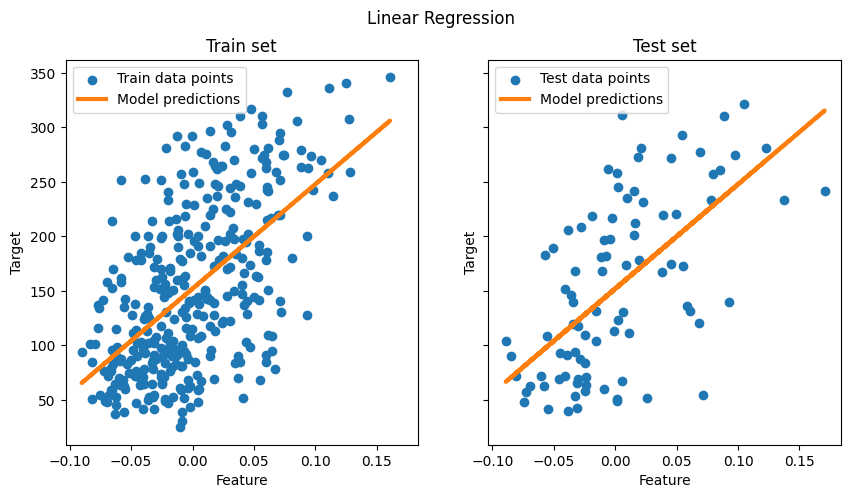

In [22]:
# data visualisation
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regression_model.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

## 1.2 Ridge Regression

```What Is Ridge Regression?```   
Ridge regression is a modified version of linear regression designed to address two common problems that can arise with standard linear models (OLS):  
1. **Multicollinearity**: When predictor variables (features) in the model are highly correlated with each other.  
2. **Overfitting**: When the model learns the training data too well, including its noise, leading to poor performance on new, unseen data, especially when the number of features is large relative to the number of observations.  

```How Ridge Regression Address These Problems?```   
Ridge regression addresses these problems of OLS by imposing a penalty on the size of the coefficients. The ridge coefficients minimise a penalised residual sum of squares:  
$$\min_w||X_w-y||_2^2+\alpha||w||_2^2$$  
Here, the $\alpha$ is called **regularisation parameter** or **tuning parameter**, which controls the strength of the penalty, with larger $\alpha$ imposing a stronger penalty on large coefficients and being more robust to multicollinearity and less prone to overfitting.

```Effect of Ridge Regression: Bias-Variance Tradeoff```  
It introduces a small amount of bias into the coefficient estimates (they are shrunk away from the OLS values).  
In return, it significantly reduces the variance of the model, especially when multicollinearity is present or the model is prone to overfitting.  
This tradeoff often leads to a lower overall error on unseen data, resulting in better generalisation performance.  

```Key Characteristics of Ridge Regression```  
1. Coefficient Shrinkage: It shrinks coefficients towards zero but rarely shrinks any coefficient exactly to zero unless $\lambda \to \infty$. This means ridge regression performs regularisation but does not perform automatic feature selection and all original features are retained in the final model.  
2. Handles Multicollinearity: It  stablised coefficient estimates when predictors are highly correlated, often assigning similar shrunken coefficient values to correlated predictors.  
3. Requires Feature Scaling: The penalty term is sensitive to the scale of the features. Features with larger values will have coefficients that are penalised more heavily. Therefore, it is standard practice to standardise or normalise the features before applying ridge regression.

``` Choosing Alpha```  
The hyperparameter that needs to be selected based on the data.  
The most common method is cross-validation and then choose the alpha that yields the best average performance.  
In sklearn, Leave-One-Out Cross-Validation (LOOCV) can be used for setting regularisation parameter.  

**What is LOOCV?**  
For a dataset with N samples, LOOCV performs N iterations of training/validation.  
In each iteration, it uses one sample as the validation set and the remaining N-1 samples as the training set.  
For Ridge model, there is a computationally efficient formula to calculate the LOOCV error which is why RidgeCV uses it by default.

**Candidate Values for Aplha**  
1. Logarithmic Spacing: np.logscape(-6, 6, 13) which generates 13 numbers evenly spaced on a log scale between $10^{-6}$ and $10^6$.  
2. Common Range:  
    i. wide exploration: $10^{-6}$ to $10^6$.  
    ii. more typical ranges: $10^{-4}$ to $10^4$ and $10^{-3}$ to $10^3$  
    iii. fine-tuning: $0.1$ to $1$

In [12]:
import numpy as np
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
print(reg.coef_)
print(reg.intercept_)
print(reg.alpha_)
print(reg.predict([[1, 0]]))
print(reg.score([[0, 0], [0, 0], [1, 1]], [0, .1, 1]))

[0.47146402 0.47146402]
0.05235732009928473
0.01
[0.52382134]
0.9917032828324677


## 1.3 Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a type of regularised linear regression technique. Its main goals are to prevent model overfitting, similar to Ridge regression, but also, distinctively, to perform feature selection.

```Core Idea```  
Lasso Regression modifies the OLS objective function by adding penalty term based on the L1 norm of the coefficient vector.   
This can be denoted as follows.  
$$\min_\beta \left\{ \sum^n_{i=1} (y_i-\beta_0-\sum_{j=1}^\beta x_{ij}\beta_j)^2+\lambda \sum^p_{j=1} |\beta_j|\right\}$$

For a vector $x = (x_1, x_2, x_3,\dots ,x_n)$ is an n-domensional space, the L1 norm, denoted as ||x||_1, is defined as 
$$||X||_1 = \sum^{n}_{i=1} |x_i|=|x_1| + |x_2| + \dots + |x_n|$$
L1 Norm: the sum of the absolute values of the components of the vector, also called <u>Manhattan Norm</u> or <u>Taxicab Norm</u>.